<a href="https://colab.research.google.com/github/JohannPalheiros/gutendex-analytics/blob/main/gutendex_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%% Importações e constantes
import requests as req
import numpy as np
import pandas as pd
import matplotlib as plt
import json as js
import math

CONST_DECODE_UTF8 = 'utf-8'
CONST_GUTENDEX_BOOKS_URL = 'https://gutendex.com/books/'
CONST_GUTENDEX_PAGE_PARAM = '?page='

CONST_PERCENT_TO_USE = 0.01
CONST_COUNT_STR = 'count'
CONST_RESULTS_STR = 'results'
CONST_PERCENT_USED_TO_SHOW = CONST_PERCENT_TO_USE * 100

In [ ]:
#%% Requisição para verificar quantidade de livros disponiveis
booksDataBytes = req.get(CONST_GUTENDEX_BOOKS_URL).content
allBooksReqData = js.loads(booksDataBytes.decode(CONST_DECODE_UTF8))
allBooksCount = allBooksReqData[CONST_COUNT_STR]
totalItensPerPage = len(allBooksReqData[CONST_RESULTS_STR])

print('Total de todos os livros existentes no gutendex:', allBooksCount)
print('Total de livros por pagina:', totalItensPerPage)

Total de todos os livros existentes no gutendex: 72007
Total de livros por pagina: 32


In [ ]:
#%% Pegando apenas amostra de 1% do total de livros
onePercentOfAllBooks = round(allBooksCount * CONST_PERCENT_TO_USE)
totalRequests = math.ceil(onePercentOfAllBooks / totalItensPerPage)

print('Total de', int(CONST_PERCENT_USED_TO_SHOW), '% dos livros:', onePercentOfAllBooks)
print('Total de requisições necessarias:', totalRequests)

Total de 1 % dos livros: 720
Total de requisições necessarias: 23


In [ ]:
#%% Iniciando requisições para carga de dados
booksListData = []

for index in range(1, totalRequests+1):
  urlToReq = CONST_GUTENDEX_BOOKS_URL + CONST_GUTENDEX_PAGE_PARAM + str(index)
  dataFromReq = req.get(urlToReq).content
  dataDecoded = js.loads(dataFromReq.decode(CONST_DECODE_UTF8))
  booksListData = booksListData + dataDecoded[CONST_RESULTS_STR]

print('Total de livros retornados que serão usados:', len(booksListData))

Total de livros retornados que serão usados: 736


In [65]:
#%% Bloco para exibir dataframe
booksDataDf = pd.DataFrame(booksListData)

booksDataDf.head()

,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,formats,download_count
0,84,"Frankenstein; Or, The Modern Prometheus","[{'name': 'Shelley, Mary Wollstonecraft', 'bir...",[],[Frankenstein's monster (Fictitious character)...,"[Gothic Fiction, Movie Books, Precursors of Sc...",[en],False,Text,{'text/plain': 'https://www.gutenberg.org/eboo...,84070
1,1513,Romeo and Juliet,"[{'name': 'Shakespeare, William', 'birth_year'...",[],"[Conflict of generations -- Drama, Juliet (Fic...",[],[en],False,Text,{'application/x-mobipocket-ebook': 'https://ww...,60644
2,1342,Pride and Prejudice,"[{'name': 'Austen, Jane', 'birth_year': 1775, ...",[],"[Courtship -- Fiction, Domestic fiction, Engla...","[Best Books Ever Listings, Harvard Classics]",[en],False,Text,{'application/octet-stream': 'https://www.gute...,53375
3,25344,The Scarlet Letter,"[{'name': 'Hawthorne, Nathaniel', 'birth_year'...",[],"[Adultery -- Fiction, Boston (Mass.) -- Histor...",[Banned Books from Anne Haight's list],[en],False,Text,{'text/plain; charset=us-ascii': 'https://www....,38073
4,11,Alice's Adventures in Wonderland,"[{'name': 'Carroll, Lewis', 'birth_year': 1832...",[],[Alice (Fictitious character from Carroll) -- ...,[Children's Literature],[en],False,Text,{'text/plain': 'https://www.gutenberg.org/eboo...,30353
...,...,...,...,...,...,...,...,...,...,...,...
731,28299,The Orbis Pictus,"[{'name': 'Comenius, Johann Amos', 'birth_year...","[{'name': 'Hoole, Charles', 'birth_year': 1610...","[Latin language -- Readers, Natural history --...",[],[en],False,Text,{'application/x-mobipocket-ebook': 'https://ww...,1042
732,2131,An Account of Egypt,"[{'name': 'Herodotus', 'birth_year': -484, 'de...","[{'name': 'Macaulay, G. C. (George Campbell)',...",[Egypt -- History -- To 332 B.C.],[Egypt],[en],False,Text,{'application/octet-stream': 'https://www.gute...,1040
733,15859,The Piazza Tales,"[{'name': 'Melville, Herman', 'birth_year': 18...",[],"[Manners and customs -- Fiction, Short stories]",[],[en],False,Text,{'text/plain; charset=us-ascii': 'https://www....,1040
734,71814,The railhead at Kysyl Khoto,"[{'name': 'Lang, Allen Kim', 'birth_year': 192...",[],"[Cold War -- Fiction, Science fiction, Short s...",[],[en],False,Text,{'application/octet-stream': 'https://www.gute...,1039


In [66]:
#%% Tratando os dados dos autores extraindo apenas os nomes
authorsDict = booksDataDf["authors"].to_frame()

for index, itens in enumerate(authorsDict["authors"]):
  if (len(itens) != 0):
    item = itens[0]['name']
    authorsDict.at[index, "authors"] = item
  else:
    authorsDict.at[index, "authors"] = 'unknown author'

authorsDict.head()

,authors
0,"Shelley, Mary Wollstonecraft"
1,"Shakespeare, William"
2,"Austen, Jane"
3,"Hawthorne, Nathaniel"
4,"Carroll, Lewis"
...,...
731,"Comenius, Johann Amos"
732,Herodotus
733,"Melville, Herman"
734,"Lang, Allen Kim"


In [67]:
#%% Tratando os livros com titulos desconhecidos
titleDict = booksDataDf["title"].to_frame()

for index, title in enumerate(titleDict["title"]):
  if (len(title) != 0):
    titleDict.at[index, "title"] = title
  else:
    titleDict.at[index, "title"] = 'unknown title'

titleDict.head()

,title
0,"Frankenstein; Or, The Modern Prometheus"
1,Romeo and Juliet
2,Pride and Prejudice
3,The Scarlet Letter
4,Alice's Adventures in Wonderland
...,...
731,The Orbis Pictus
732,An Account of Egypt
733,The Piazza Tales
734,The railhead at Kysyl Khoto


In [72]:
#%% Tratando os generos dos livros

NameError: ignored

In [ ]:
#%% Atualizando dados dos titulos e nomes dos autores no data frame
booksDataDf["authors"] = authorsDict
booksDataDf["title"] = titleDict

booksDataDf.head()

,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,formats,download_count
0,84,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",[],[Frankenstein's monster (Fictitious character)...,"[Gothic Fiction, Movie Books, Precursors of Sc...",[en],False,Text,{'text/plain': 'https://www.gutenberg.org/eboo...,84070
1,1513,Romeo and Juliet,"Shakespeare, William",[],"[Conflict of generations -- Drama, Juliet (Fic...",[],[en],False,Text,{'application/x-mobipocket-ebook': 'https://ww...,60644
2,1342,Pride and Prejudice,"Austen, Jane",[],"[Courtship -- Fiction, Domestic fiction, Engla...","[Best Books Ever Listings, Harvard Classics]",[en],False,Text,{'application/octet-stream': 'https://www.gute...,53375
3,25344,The Scarlet Letter,"Hawthorne, Nathaniel",[],"[Adultery -- Fiction, Boston (Mass.) -- Histor...",[Banned Books from Anne Haight's list],[en],False,Text,{'text/plain; charset=us-ascii': 'https://www....,38073
4,11,Alice's Adventures in Wonderland,"Carroll, Lewis",[],[Alice (Fictitious character from Carroll) -- ...,[Children's Literature],[en],False,Text,{'text/plain': 'https://www.gutenberg.org/eboo...,30353


In [ ]:
#%% verificando as tipagens
booksDataDf.dtypes

id                 int64
title             object
authors           object
translators       object
subjects          object
bookshelves       object
languages         object
copyright           bool
media_type        object
formats           object
download_count     int64
dtype: object

In [ ]:
#%% trocando as tipagens das colunas object para string
booksDataDf[['title', 'authors','translators','subjects','bookshelves','languages',
             'media_type','formats']] = booksDataDf[['title', 'authors','translators',
                                                     'subjects','bookshelves','languages',
                                                     'media_type','formats']].astype(str)

In [ ]:
#%% verificando a quantidade de dados unicos em cada coluna
booksDataDf.nunique()

id                736
title             720
authors           410
translators       138
subjects          677
bookshelves       182
languages          19
copyright           2
media_type          1
formats           736
download_count    634
dtype: int64

In [ ]:
#%% por ter mais ids unicos que titulos unicos, percebo que há titulos repetidos e irei investigar isso
duplicatedDf = booksDataDf[booksDataDf.duplicated(['title'])]
duplicatedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 41 to 664
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              16 non-null     int64 
 1   title           16 non-null     object
 2   authors         16 non-null     object
 3   translators     16 non-null     object
 4   subjects        16 non-null     object
 5   bookshelves     16 non-null     object
 6   languages       16 non-null     object
 7   copyright       16 non-null     bool  
 8   media_type      16 non-null     object
 9   formats         16 non-null     object
 10  download_count  16 non-null     int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 1.4+ KB


In [ ]:
#%% realmente tinham titulos repetidos, o que seria um problema para dizer quantos
#%% downloads haveriam de verdade em cada titulo
groupbyDF = booksDataDf.groupby(['title'], as_index=False)['download_count'].sum()
groupbyDF.sort_values('download_count', ascending=False)

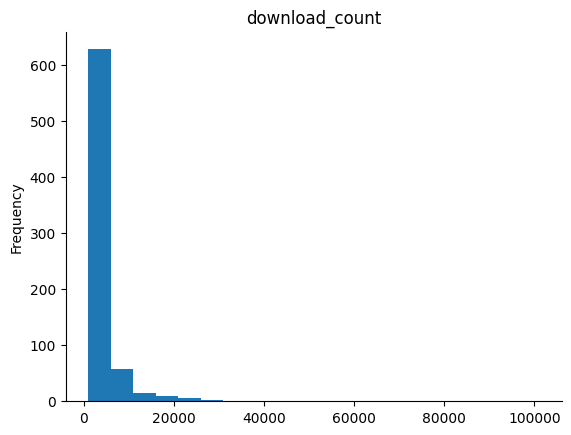

In [69]:
from matplotlib import pyplot as plt
_df_0['download_count'].plot(kind='hist', bins=20, title='download_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#%% na visão cima podemos ver os 5 livros mais baixados
#%% nesta logo abaixo, podemos ver os 5 livros menos baixados
groupbyDF.sort_values('download_count', ascending=False).tail()

,title,download_count
158,"Eve's Diary, Complete",1042
47,An Account of Egypt,1040
541,The Piazza Tales,1040
661,The railhead at Kysyl Khoto,1039
251,Milton: Minor Poems,1037


In [ ]:
#%% verificando alguns
groupbyDF.describe().round(2)

,download_count
count,720.00
mean,3563.16
std,6201.01
min,1037.00
25%,1333.25
50%,1751.50
75%,3205.50
max,101031.00
